In [1]:
%matplotlib inline

# El-Badry set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
elbadry = pd.read_csv('../data_raw/200_pc_ms_ms_with_masses.csv')

In [4]:
elbadry.columns

Index(['source_id2', 'ra2', 'dec2', 'astrometric_chi2_al_2',
       'astrometric_n_good_obs_al2', 'phot_g_mean_flux_over_error2',
       'phot_rp_mean_flux_over_error2', 'phot_bp_mean_flux_over_error2',
       'phot_bp_rp_excess_factor2', 'pmra2', 'pmra_error2', 'pmdec2',
       'pmdec_error2', 'phot_g_mean_mag2', 'phot_bp_mean_mag2',
       'phot_rp_mean_mag2', 'parallax2', 'parallax_over_error2',
       'radial_velocity2', 'radial_velocity_error2', 'rv_nb_transits2',
       'source_id', 'ra', 'dec', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'parallax',
       'parallax_over_error', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'phot_g_mean_flux_over_error',
       'phot_rp_mean_flux_over_error', 'phot_bp_mean_flux_over_error',
       'phot_bp_rp_excess_factor', 'radial_velocity', 'radial_velocity_error',
       'rv_nb_transits', 'pairdistance', 'binary_class', 's_AU', 'mass1',
       'mass2', 'type1', 

In [5]:
elbadry['distance']    = 1000/elbadry.parallax
elbadry['distance2']   = 1000/elbadry.parallax2
elbadry['phot_g_abs']  = elbadry.phot_g_mean_mag - 5*np.log10(elbadry.distance/10)
elbadry['phot_g_abs2'] = elbadry.phot_g_mean_mag2 - 5*np.log10(elbadry.distance2/10)
elbadry['colour']      = elbadry.phot_bp_mean_mag - elbadry.phot_rp_mean_mag
elbadry['colour2']     = elbadry.phot_bp_mean_mag2 - elbadry.phot_rp_mean_mag2
elbadry['logmass1']    = np.log10(elbadry.mass1)
elbadry['logmass2']    = np.log10(elbadry.mass2)

In [7]:
# Keep only near stars
elbadry_prim = elbadry[(elbadry.distance < 100)]
elbadry_sec  = elbadry[(elbadry.distance2 < 100)]

<AxesSubplot:xlabel='phot_g_abs2', ylabel='logmass2'>

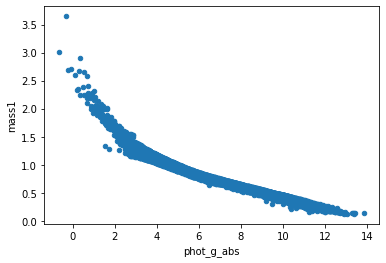

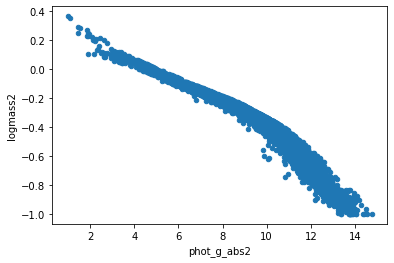

In [8]:
elbadry_prim.plot.scatter('phot_g_abs','mass1')
elbadry_sec.plot.scatter('phot_g_abs2','logmass2')

<AxesSubplot:xlabel='colour2', ylabel='logmass2'>

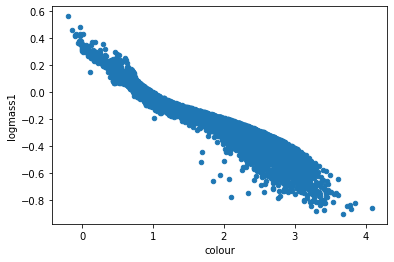

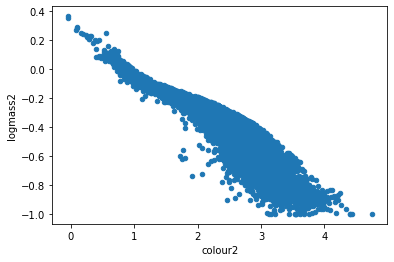

In [9]:
elbadry_prim.plot.scatter('colour','logmass1')
elbadry_sec.plot.scatter('colour2','logmass2')

In [10]:
import numpy as np
import statsmodels.api as sm

Do for the primaries

In [11]:
np.array(elbadry_prim[['phot_g_abs','logmass1']])

array([[ 6.76054689, -0.13927845],
       [10.98346585, -0.49086713],
       [ 5.62424848, -0.06396053],
       ...,
       [ 6.00560228, -0.1058828 ],
       [ 6.79934422, -0.14102929],
       [ 8.00922794, -0.18811491]])

In [12]:
X = sm.add_constant(np.array(elbadry_prim[elbadry_prim.phot_g_abs < 9]['phot_g_abs']))
Y = np.array(elbadry_prim[elbadry_prim.phot_g_abs < 9]['logmass1'])

In [13]:
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.562e+05
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:15:23   Log-Likelihood:                 15031.
No. Observations:                6041   AIC:                        -3.006e+04
Df Residuals:                    6039   BIC:                        -3.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3250      0.001    380.247      0.000       0.323       0.327
x1            -0.0680      0.000   -506.124      0.000      -0.068      -0.068
==============================================================================
Omnibus:                      846.052   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7040.530
Skew:                           0.406   Prob(JB):                         0.00
Kurtosis:                       8.226   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

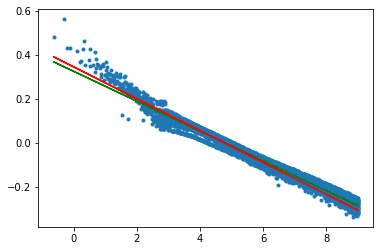

In [17]:
plt.plot(X[:,1],Y,'.')
plt.plot(X[:,1],-0.068*X[:,1]+.325,'g')
plt.plot(X[:,1],0.0725*(4.76-X[:,1]),'r')

## Import regresion packages

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [12]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [13]:
model = LinearRegression().fit(x,y)

In [19]:
model.coef_

array([0.54])

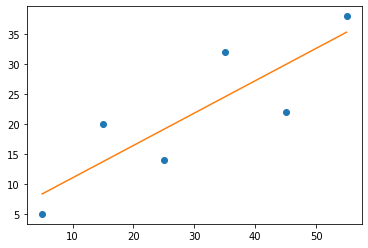

In [22]:
plt.plot(x,y,'o')
plt.plot(x,model.coef_*x+model.intercept_)

## statsmodels

In [24]:
import numpy as np
import statsmodels.api as sm

In [60]:
nobs = 10
X = sm.add_constant(np.random.random((nobs)))
beta = [1.,0.5]
e = 0.1*np.random.random(nobs)
Y = np.dot(X,beta) + e

In [61]:
results = sm.OLS(Y, X).fit()

In [62]:
results.summary()

/home/lupido/.local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     149.5
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.86e-06
Time:                        03:39:38   Log-Likelihood:                 21.850
No. Observations:                  10   AIC:                            -39.70
Df Residuals:                       8   BIC:                            -39.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0201      0.025     40.593      0.000       0.962       1.078
x1             0.5569      0.046     12.229      0.000       0.452       0.662
==============================================================================
Omnibus:                        0.687   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.472
Skew:                          -0.454   Prob(JB):                        0.790
Kurtosis:                       2.447   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

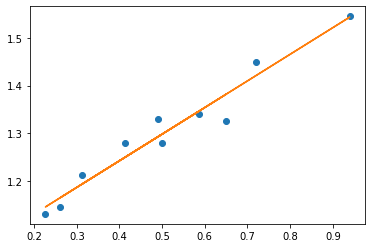

In [64]:
plt.plot(X[:,1],Y,'o')
plt.plot(X[:,1],0.5569*X[:,1]+1.0201)

In [52]:
Y

array([1.41930206, 1.46870788, 1.96225595, 2.01460476, 1.94804096,
       1.52473291, 2.38790445, 2.03350345, 1.60994805, 1.71289291])